In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from dask import dataframe as df1
import warnings
import os

os.getcwd()
os.chdir(r"C:\Users\yekaa\Downloads")

C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
data = pd.read_csv("datacleantarget_2018_with_Dummies.csv", nrows=2000000)
default = pd.read_csv("default_new.csv")

In [3]:
data.head()

,Unnamed: 0,derived_msa-md,lei,state_code,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,...,balloon_payment_1,balloon_payment_2,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74
0,0,29404,KB1H1DSPRFMYMCUFXT09,WI,5.505900e+10,45000.0,96.32,NaN,NaN,NaN,...,0,1,0,0,0,1,0,0,0,0
1,1,29404,KV8W1JTB8FZ821S5ED75,WI,5.505900e+10,145000.0,94.7,4.375,0.27,2913.92,...,0,1,0,0,0,1,0,0,0,0
2,2,29404,ZF85QS7OXKPBG52R7N18,WI,5.505900e+10,145000.0,72.486,4.25,-0.073,1939.0,...,0,1,0,0,1,0,0,0,0,0
3,3,29404,ZF85QS7OXKPBG52R7N18,WI,5.505900e+10,215000.0,95.0,4.5,0.674,1781.69,...,0,1,0,1,0,0,0,0,0,0
4,4,29404,ZF85QS7OXKPBG52R7N18,WI,5.505900e+10,255000.0,95.0,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0


In [4]:
data['location'] = data['countyname'] + ' ' + data['state_code'] 
data = data.drop(['state_code', 'countyname'], axis=1)
data = data.rename(columns={'location': "countyname"})

In [5]:
default.head()

,Unnamed: 0,loan_id,orig_chn,seller,interest_rate,loan_amount,loan_term,oltv,loan_to_value_ratio,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32,debt_to_income_ratio,occupancy_type
0,0,1.000000e+11,R,OTHER,8.250,50000,360,50,50,2,...,1,0.378788,0,1,1,0,0,0,4,1
1,1,1.000000e+11,R,"GMAC MORTGAGE, LLC",8.000,170000,360,80,80,2,...,1,0.854271,2,2,1,0,0,0,5,1
2,3,1.010000e+11,B,"JP MORGAN CHASE BANK, NA",8.500,141000,360,74,74,2,...,1,0.792135,1,1,1,0,0,0,4,1
3,4,1.010000e+11,R,"JP MORGAN CHASE BANK, NA",8.050,63000,180,61,61,2,...,0,0.353933,1,1,0,0,0,1,2,1
4,5,1.010000e+11,C,"JPMORGAN CHASE BANK, NA",7.875,56000,360,78,78,1,...,1,0.386207,1,1,1,0,0,0,3,1


In [6]:
flood2021 = data[data["Approval"] == 1]
flood2021.shape

(1538609, 153)

In [7]:
flood2021['agg_ff'] = np.round((flood2021['count_floodfactor1'] * 1 + flood2021['count_floodfactor2'] * 2 + flood2021['count_floodfactor3'] * 3 + flood2021['count_floodfactor4'] * 4 + flood2021['count_floodfactor5'] * 5 + flood2021['count_floodfactor6'] * 6 + flood2021['count_floodfactor7'] * 7 + flood2021['count_floodfactor8'] * 8 + flood2021['count_floodfactor9'] * 9 + flood2021['count_floodfactor10'] * 10) / flood2021['count_property_x'], decimals=2)

<ipython-input-7-c5fcf612e2d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood2021['agg_ff'] = np.round((flood2021['count_floodfactor1'] * 1 + flood2021['count_floodfactor2'] * 2 + flood2021['count_floodfactor3'] * 3 + flood2021['count_floodfactor4'] * 4 + flood2021['count_floodfactor5'] * 5 + flood2021['count_floodfactor6'] * 6 + flood2021['count_floodfactor7'] * 7 + flood2021['count_floodfactor8'] * 8 + flood2021['count_floodfactor9'] * 9 + flood2021['count_floodfactor10'] * 10) / flood2021['count_property_x'], decimals=2)


flood2021['agg_class'] = 'default'  # set default value for all rows
flood2021.loc[(flood2021['agg_ff'] >=0) & (flood2021['agg_ff']<=2), 'agg_class'] = 'one'  # set value to 'high' for rows where 'A' > 3 and 'B' > 30
flood2021.loc[(flood2021['agg_ff'] >2) & (flood2021['agg_ff']<=3), 'agg_class'] = 'two'
flood2021.loc[(flood2021['agg_ff'] >3) & (flood2021['agg_ff']<=4), 'agg_class'] = 'three'
flood2021.loc[(flood2021['agg_ff'] >4) & (flood2021['agg_ff']<=5), 'agg_class'] = 'four'
flood2021.loc[(flood2021['agg_ff'] >5) & (flood2021['agg_ff']<=6), 'agg_class'] = 'five'
flood2021.loc[(flood2021['agg_ff'] >6) & (flood2021['agg_ff']<=7), 'agg_class'] = 'six'
flood2021.loc[(flood2021['agg_ff'] >7) & (flood2021['agg_ff']<=8), 'agg_class'] = 'seven'
flood2021.loc[(flood2021['agg_ff'] >8) & (flood2021['agg_ff']<=9), 'agg_class'] = 'eight'
flood2021.loc[(flood2021['agg_ff'] >9) & (flood2021['agg_ff']<=10), 'agg_class'] = 'nine'
flood2021.loc[(flood2021['agg_ff'] >10) & (flood2021['agg_ff']<=11), 'agg_class'] = 'ten'

In [8]:
flood2021['agg_class'] = 'default'  # set default value for all rows
flood2021.loc[(flood2021['agg_ff'] >=0) & (flood2021['agg_ff']<=3), 'agg_class'] = 'Low Risk'  # set value to 'high' for rows where 'A' > 3 and 'B' > 30
flood2021.loc[(flood2021['agg_ff'] >3) & (flood2021['agg_ff']<=10), 'agg_class'] = 'High Risk'

<ipython-input-8-d431822f94f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood2021['agg_class'] = 'default'  # set default value for all rows


In [9]:
flood2021.head()

,Unnamed: 0,derived_msa-md,lei,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,countyname,agg_ff,agg_class
1,1,29404,KV8W1JTB8FZ821S5ED75,5.505900e+10,145000.0,94.7,4.375,0.27,2913.92,NaN,...,0,0,1,0,0,0,0,Kenosha County WI,1.84,Low Risk
2,2,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,145000.0,72.486,4.25,-0.073,1939.0,NaN,...,0,1,0,0,0,0,0,Kenosha County WI,1.84,Low Risk
3,3,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,215000.0,95.0,4.5,0.674,1781.69,NaN,...,1,0,0,0,0,0,0,Kenosha County WI,1.84,Low Risk
5,5,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,105000.0,80.0,4.5,0.001,1804.0,NaN,...,0,0,0,0,0,1,0,Kenosha County WI,1.84,Low Risk
6,6,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,175000.0,96.5,4.5,0.969,4730.95,NaN,...,0,0,1,0,0,0,0,Kenosha County WI,1.84,Low Risk


In [10]:
loans = flood2021[['census_tract','agg_ff','agg_class','countyname','loan_amount','loan_to_value_ratio','debt_to_income_ratio','interest_rate', 
'total_loan_costs','origination_charges','loan_term','property_value','income','tract_population', 'tract_minority_population_percent', 
'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage', 'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
'tract_median_age_of_housing_units','conforming_loan_limit_C', 'conforming_loan_limit_NC', 'conforming_loan_limit_U', 
'derived_loan_product_type_Conventional:First Lien', 'derived_loan_product_type_Conventional:Subordinate Lien', 'derived_loan_product_type_FHA:First Lien', 'derived_loan_product_type_FHA:Subordinate Lien', 'derived_loan_product_type_FSA/RHS:First Lien', 
'derived_loan_product_type_FSA/RHS:Subordinate Lien', 'derived_loan_product_type_VA:First Lien', 'derived_loan_product_type_VA:Subordinate Lien', 
'derived_dwelling_category_Multifamily:Manufactured', 'derived_dwelling_category_Multifamily:Site-Built', 'derived_dwelling_category_Single Family (1-4 Units):Manufactured', 'derived_dwelling_category_Single Family (1-4 Units):Site-Built', 
'derived_ethnicity_Hispanic or Latino', 'derived_ethnicity_Joint', 'derived_race_2 or more minority races', 'derived_race_American Indian or Alaska Native', 'derived_race_Asian', 'derived_race_Black or African American', 'derived_race_Joint', 'derived_race_Native Hawaiian or Other Pacific Islander', 'derived_race_White', 
'derived_sex_Female', 'derived_sex_Joint', 'derived_sex_Male', 
'purchaser_type_0', 'purchaser_type_1', 'purchaser_type_2', 'purchaser_type_3', 'purchaser_type_4', 'purchaser_type_5', 'purchaser_type_6', 'purchaser_type_8', 'purchaser_type_9', 'purchaser_type_71', 'purchaser_type_72', 
'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31', 'loan_purpose_32', 
'reverse_mortgage_1', 'reverse_mortgage_2', 'reverse_mortgage_1111', 
'open-end_line_of_credit_1', 'open-end_line_of_credit_2', 'open-end_line_of_credit_1111', 
'business_or_commercial_purpose_1', 'business_or_commercial_purpose_2', 'business_or_commercial_purpose_1111', 
'hoepa_status_1', 'hoepa_status_2', 'hoepa_status_3', 
'negative_amortization_1', 'negative_amortization_2', 'negative_amortization_1111', 
'interest_only_payment_1', 'interest_only_payment_2', 'interest_only_payment_1111', 
'balloon_payment_1', 'balloon_payment_2', 'balloon_payment_1111', 
'applicant_age_25-34', 'applicant_age_35-44', 'applicant_age_45-54', 'applicant_age_55-64', 'applicant_age_65-74', 'applicant_age_<25', 'applicant_age_>74']]

In [11]:
loans = loans.replace('Exempt', None)

In [12]:
na_counts = loans.isna().sum()
na_counts_sorted = na_counts.sort_values(ascending=False)
na_counts_sorted

total_loan_costs                                                    387143
origination_charges                                                 380093
loan_to_value_ratio                                                  89410
debt_to_income_ratio                                                 82597
interest_rate                                                        57488
                                                                     ...  
derived_ethnicity_Hispanic or Latino                                     0
derived_dwelling_category_Single Family (1-4 Units):Site-Built           0
derived_dwelling_category_Single Family (1-4 Units):Manufactured         0
derived_dwelling_category_Multifamily:Site-Built                         0
applicant_age_>74                                                        0
Length: 92, dtype: int64

In [13]:
loans = loans.dropna()
loans.shape

(1069757, 92)

In [14]:
loans['debt_to_income_ratio'].unique()

array(['20%-<30%', '49', '40', '36', '43', '30%-<36%', '50%-60%', '42',
       '45', '39', '47', '44', '41', '<20%', '38', '48', '46', '>60%',
       '37'], dtype=object)

In [15]:
replacement_dict = {'20%-<30%': '25', '30%-<36%': '33', '50%-60%': '55', '>60%': '75', '<20%': '15'}
loans['debt_to_income_ratio'] = loans['debt_to_income_ratio'].replace(replacement_dict)
loans['debt_to_income_ratio']

1          25
2          49
3          40
5          25
6          36
           ..
1999990    41
1999992    55
1999993    33
1999994    33
1999996    55
Name: debt_to_income_ratio, Length: 1069757, dtype: object

In [16]:
loans['debt_to_income_ratio'] = loans['debt_to_income_ratio'].astype(int)
# Replace values based on conditions
loans.loc[loans['debt_to_income_ratio'] <= 20, 'debt_to_income_ratio'] = 0
loans.loc[(loans['debt_to_income_ratio'] >20) & (loans['debt_to_income_ratio'] <= 30), 'debt_to_income_ratio'] = 1
loans.loc[(loans['debt_to_income_ratio'] >30) & (loans['debt_to_income_ratio'] <= 40), 'debt_to_income_ratio'] = 2
loans.loc[(loans['debt_to_income_ratio'] >40) & (loans['debt_to_income_ratio'] <= 50), 'debt_to_income_ratio'] = 3
loans.loc[(loans['debt_to_income_ratio'] >50) & (loans['debt_to_income_ratio'] <= 60), 'debt_to_income_ratio'] = 4
loans.loc[loans['debt_to_income_ratio'] >60,  'debt_to_income_ratio'] = 5

In [17]:
# Create new column by adding columns A and B
loans = loans.assign(loan_purpose_other= loans['loan_purpose_2'] + loans['loan_purpose_4']+ loans['loan_purpose_5'])

# Drop columns A and B
loans = loans.drop(['loan_purpose_2','loan_purpose_4','loan_purpose_5'], axis=1)


In [18]:
loans['FICO'] = 680
loans.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO
1,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,94.7,1,4.375,2913.92,1000.0,...,0,0,0,1,0,0,0,0,0,680
2,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,72.486,3,4.25,1939.0,495.0,...,0,0,1,0,0,0,0,0,0,680
3,5.505900e+10,1.84,Low Risk,Kenosha County WI,215000.0,95.0,2,4.5,1781.69,580.69,...,0,1,0,0,0,0,0,0,0,680
5,5.505900e+10,1.84,Low Risk,Kenosha County WI,105000.0,80.0,1,4.5,1804.0,495.0,...,0,0,0,0,0,0,1,0,0,680
6,5.505900e+10,1.84,Low Risk,Kenosha County WI,175000.0,96.5,2,4.5,4730.95,495.0,...,0,0,0,1,0,0,0,0,0,680


In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069757 entries, 1 to 1999996
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   census_tract                                                      1069757 non-null  float64
 1   agg_ff                                                            1069757 non-null  float64
 2   agg_class                                                         1069757 non-null  object 
 3   countyname                                                        1069757 non-null  object 
 4   loan_amount                                                       1069757 non-null  float64
 5   loan_to_value_ratio                                               1069757 non-null  object 
 6   debt_to_income_ratio                                              1069757 non-null  int32  
 7   interest_

In [20]:
loans = loans.astype({'loan_to_value_ratio':'float','interest_rate':'float', 
                      'total_loan_costs': 'float', 'origination_charges':'float', 
                      'loan_term':'float','property_value':'float'})
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069757 entries, 1 to 1999996
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   census_tract                                                      1069757 non-null  float64
 1   agg_ff                                                            1069757 non-null  float64
 2   agg_class                                                         1069757 non-null  object 
 3   countyname                                                        1069757 non-null  object 
 4   loan_amount                                                       1069757 non-null  float64
 5   loan_to_value_ratio                                               1069757 non-null  float64
 6   debt_to_income_ratio                                              1069757 non-null  int32  
 7   interest_

In [21]:
default.head()

,Unnamed: 0,loan_id,orig_chn,seller,interest_rate,loan_amount,loan_term,oltv,loan_to_value_ratio,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32,debt_to_income_ratio,occupancy_type
0,0,1.000000e+11,R,OTHER,8.250,50000,360,50,50,2,...,1,0.378788,0,1,1,0,0,0,4,1
1,1,1.000000e+11,R,"GMAC MORTGAGE, LLC",8.000,170000,360,80,80,2,...,1,0.854271,2,2,1,0,0,0,5,1
2,3,1.010000e+11,B,"JP MORGAN CHASE BANK, NA",8.500,141000,360,74,74,2,...,1,0.792135,1,1,1,0,0,0,4,1
3,4,1.010000e+11,R,"JP MORGAN CHASE BANK, NA",8.050,63000,180,61,61,2,...,0,0.353933,1,1,0,0,0,1,2,1
4,5,1.010000e+11,C,"JPMORGAN CHASE BANK, NA",7.875,56000,360,78,78,1,...,1,0.386207,1,1,1,0,0,0,3,1


In [22]:
default = default[['delin_90','loan_amount','loan_to_value_ratio','interest_rate','debt_to_income_ratio','loan_term','loan_purpose_1', 'loan_purpose_other','loan_purpose_31', 'loan_purpose_32']]
default.head()

,delin_90,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
0,0,50000,50,8.250,4,360,1,0,0,0
1,0,170000,80,8.000,5,360,1,0,0,0
2,0,141000,74,8.500,4,360,1,0,0,0
3,1,63000,61,8.050,2,180,0,0,0,1
4,0,56000,78,7.875,3,360,1,0,0,0


In [23]:
default['delin_90'].value_counts()

0    63702
1     4002
Name: delin_90, dtype: int64

In [24]:
print(default.info())
print(default.isna().sum())
print(default.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67704 entries, 0 to 67703
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   delin_90              67704 non-null  int64  
 1   loan_amount           67704 non-null  int64  
 2   loan_to_value_ratio   67704 non-null  int64  
 3   interest_rate         67704 non-null  float64
 4   debt_to_income_ratio  67704 non-null  int64  
 5   loan_term             67704 non-null  int64  
 6   loan_purpose_1        67704 non-null  int64  
 7   loan_purpose_other    67704 non-null  int64  
 8   loan_purpose_31       67704 non-null  int64  
 9   loan_purpose_32       67704 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.2 MB
None
delin_90                0
loan_amount             0
loan_to_value_ratio     0
interest_rate           0
debt_to_income_ratio    0
loan_term               0
loan_purpose_1          0
loan_purpose_other      0
loan_purpose_31 

In [25]:
loans_def = loans[['loan_amount','loan_to_value_ratio','interest_rate','debt_to_income_ratio','loan_term','loan_purpose_1', 'loan_purpose_other','loan_purpose_31', 'loan_purpose_32']]
loans_def.head()

,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
1,145000.0,94.700,4.375,1,360.0,1,0,0,0
2,145000.0,72.486,4.250,3,360.0,1,0,0,0
3,215000.0,95.000,4.500,2,360.0,1,0,0,0
5,105000.0,80.000,4.500,1,360.0,1,0,0,0
6,175000.0,96.500,4.500,2,360.0,1,0,0,0


Mean: 304779.35
Median: 235000.00
Standard Deviation: 305173.14
Minimum Value: 5000.00
Maximum Value: 20005000.00


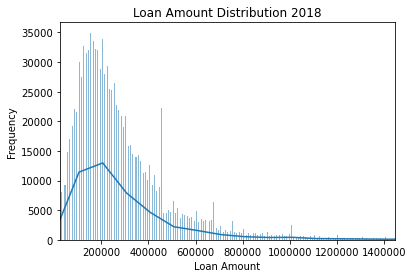

,mean,median,std,min,max
Loan Amount,304779.351759,235000.0,305173.138226,5000.0,20005000.0


In [26]:
# Extract the column of interest
column_of_interest = loans['loan_amount']
# Create a histogram with density plot using Seaborn
sns.histplot(column_of_interest, kde=True)

# Add a title and axis labels
plt.title('Loan Amount Distribution 2018')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Set the x-axis limits to zoom in on the highest frequency area
plt.xlim(column_of_interest.quantile(0.01), column_of_interest.quantile(0.99))
# Modify the x-axis tick format
plt.ticklabel_format(style='plain', axis='x')

# Calculate mean, median, and other metrics using Pandas
mean = column_of_interest.mean()
median = column_of_interest.median()
std = column_of_interest.std()
min_val = column_of_interest.min()
max_val = column_of_interest.max()

# Print the metrics
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Standard Deviation: {:.2f}'.format(std))
print('Minimum Value: {:.2f}'.format(min_val))
print('Maximum Value: {:.2f}'.format(max_val))

# Show the plot
plt.show()

# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df1 = pd.DataFrame(metrics_dict, index=['Loan Amount'])

df1

In [27]:
# Calculate mean, median, and other metrics using Pandas
mean = loans['loan_to_value_ratio'].mean()
median = loans['loan_to_value_ratio'].median()
std = loans['loan_to_value_ratio'].std()
min_val = loans['loan_to_value_ratio'].min()
max_val = loans['loan_to_value_ratio'].max()

# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df2 = pd.DataFrame(metrics_dict, index=['Loan to Value Ratio'])

df2

,mean,median,std,min,max
Loan to Value Ratio,85.531187,80.0,3574.313914,0.19,3000000.0


In [28]:


# Calculate mean, median, and other metrics using Pandas
mean = loans['interest_rate'].mean()
median = loans['interest_rate'].median()
std = loans['interest_rate'].std()
min_val = loans['interest_rate'].min()
max_val = loans['interest_rate'].max()

# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df3 = pd.DataFrame(metrics_dict, index=['Interest Rate'])

df3

,mean,median,std,min,max
Interest Rate,4.711508,4.625,6.310332,0.001,4875.0


In [29]:
# Title loans['debt_to_income_ratio']
# Calculate mean, median, and other metrics using Pandas
mean = loans['debt_to_income_ratio'].mean()
median = loans['debt_to_income_ratio'].median()
std = loans['debt_to_income_ratio'].std()
min_val = loans['debt_to_income_ratio'].min()
max_val = loans['debt_to_income_ratio'].max()



# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df4 = pd.DataFrame(metrics_dict, index=['Debt to Income Ratio'])

df4

,mean,median,std,min,max
Debt to Income Ratio,2.184567,2.0,1.004505,0,5


In [30]:
# Concatenate the dataframes
metrics = pd.concat([df1, df2, df3,df4])
metrics

,mean,median,std,min,max
Loan Amount,304779.351759,235000.000,305173.138226,5000.000,20005000.0
Loan to Value Ratio,85.531187,80.000,3574.313914,0.190,3000000.0
Interest Rate,4.711508,4.625,6.310332,0.001,4875.0
Debt to Income Ratio,2.184567,2.000,1.004505,0.000,5.0


In [31]:
X_train = default.drop(['delin_90'], axis = 1)
y_train = default['delin_90']
X_test = loans_def

In [32]:
X_train.shape

(67704, 9)

In [33]:
y_train.shape

(67704,)

In [34]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis = 1)

new = df_resampled
X_train = new.drop(['delin_90'], axis=1)
y_train = new['delin_90']

In [35]:
X_train.shape

(127404, 9)

In [36]:
y_train.shape

(127404,)

In [37]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 18, max_features= 'sqrt', n_estimators= 200,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=200, random_state=42)

In [38]:
train_score_rf = rf.score(X_train, y_train)
print('Train Accuracy Score', train_score_rf)

Train Accuracy Score 0.9502919845530753


In [39]:
prob_rf = rf.predict_proba(X_test)
df_prob_rf = pd.DataFrame(prob_rf)
df_prob_rf.head()

,0,1
0,0.987682,0.012318
1,0.988769,0.011231
2,0.913021,0.086979
3,0.987599,0.012401
4,0.934055,0.065945


In [40]:
pred_rf = rf.predict(X_test)
df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.head()

,0
0,0
1,0
2,0
3,0
4,0


In [41]:
df_pred_rf[0].value_counts()

0    1020669
1      49088
Name: 0, dtype: int64

In [42]:
loans.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO
1,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,94.700,1,4.375,2913.92,1000.00,...,0,0,0,1,0,0,0,0,0,680
2,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,72.486,3,4.250,1939.00,495.00,...,0,0,1,0,0,0,0,0,0,680
3,5.505900e+10,1.84,Low Risk,Kenosha County WI,215000.0,95.000,2,4.500,1781.69,580.69,...,0,1,0,0,0,0,0,0,0,680
5,5.505900e+10,1.84,Low Risk,Kenosha County WI,105000.0,80.000,1,4.500,1804.00,495.00,...,0,0,0,0,0,0,1,0,0,680
6,5.505900e+10,1.84,Low Risk,Kenosha County WI,175000.0,96.500,2,4.500,4730.95,495.00,...,0,0,0,1,0,0,0,0,0,680


In [43]:
loans_w = loans.copy()

In [44]:
loans_w = loans_w.reset_index(drop=True)
loans_w.shape

(1069757, 91)

In [45]:
df_pred_rf = df_pred_rf.reset_index(drop=True)
df_pred_rf.shape

(1069757, 1)

In [46]:
loans_w['Pred_Default'] = df_pred_rf
loans_w.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default
0,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,94.700,1,4.375,2913.92,1000.00,...,0,0,1,0,0,0,0,0,680,0
1,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,72.486,3,4.250,1939.00,495.00,...,0,1,0,0,0,0,0,0,680,0
2,5.505900e+10,1.84,Low Risk,Kenosha County WI,215000.0,95.000,2,4.500,1781.69,580.69,...,1,0,0,0,0,0,0,0,680,0
3,5.505900e+10,1.84,Low Risk,Kenosha County WI,105000.0,80.000,1,4.500,1804.00,495.00,...,0,0,0,0,0,1,0,0,680,0
4,5.505900e+10,1.84,Low Risk,Kenosha County WI,175000.0,96.500,2,4.500,4730.95,495.00,...,0,0,1,0,0,0,0,0,680,0


In [47]:
loans_w['Pred_Default'].value_counts()

0    1020669
1      49088
Name: Pred_Default, dtype: int64

In [48]:
f = loans_w.copy()

In [49]:
f['Ethnicity'] = np.where((f['derived_ethnicity_Hispanic or Latino'] == 1), 'Hispanice or Latino',
                          np.where((f['derived_ethnicity_Joint'] == 1), 'Ethnicity_Joint',
                                   np.where((f['derived_race_2 or more minority races'] == 1), '2 or more minority races',
                                            np.where((f['derived_race_American Indian or Alaska Native'] == 1), 'American Indian or Alaska Native',
                                                     np.where((f['derived_race_Asian'] == 1), 'Asian',
                                                              np.where((f['derived_race_Black or African American'] == 1), 'Black or African American',
                                                                       np.where((f['derived_race_Joint'] == 1), 'Race Joint',
                                                                                np.where((f['derived_race_Native Hawaiian or Other Pacific Islander'] == 1), 'Hawaiian or Other Pacific Islander',
                                                                                    np.where((f['derived_race_White'] == 1), 'White', None)))))))))

In [50]:
f.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default,Ethnicity
0,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,94.700,1,4.375,2913.92,1000.00,...,0,1,0,0,0,0,0,680,0,Asian
1,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,72.486,3,4.250,1939.00,495.00,...,1,0,0,0,0,0,0,680,0,White
2,5.505900e+10,1.84,Low Risk,Kenosha County WI,215000.0,95.000,2,4.500,1781.69,580.69,...,0,0,0,0,0,0,0,680,0,White
3,5.505900e+10,1.84,Low Risk,Kenosha County WI,105000.0,80.000,1,4.500,1804.00,495.00,...,0,0,0,0,1,0,0,680,0,White
4,5.505900e+10,1.84,Low Risk,Kenosha County WI,175000.0,96.500,2,4.500,4730.95,495.00,...,0,1,0,0,0,0,0,680,0,White


In [51]:
data.head()

,Unnamed: 0,derived_msa-md,lei,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,...,balloon_payment_2,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,countyname
0,0,29404,KB1H1DSPRFMYMCUFXT09,5.505900e+10,45000.0,96.32,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,Kenosha County WI
1,1,29404,KV8W1JTB8FZ821S5ED75,5.505900e+10,145000.0,94.7,4.375,0.27,2913.92,NaN,...,1,0,0,0,1,0,0,0,0,Kenosha County WI
2,2,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,145000.0,72.486,4.25,-0.073,1939.0,NaN,...,1,0,0,1,0,0,0,0,0,Kenosha County WI
3,3,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,215000.0,95.0,4.5,0.674,1781.69,NaN,...,1,0,1,0,0,0,0,0,0,Kenosha County WI
4,4,29404,ZF85QS7OXKPBG52R7N18,5.505900e+10,255000.0,95.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,0,Kenosha County WI


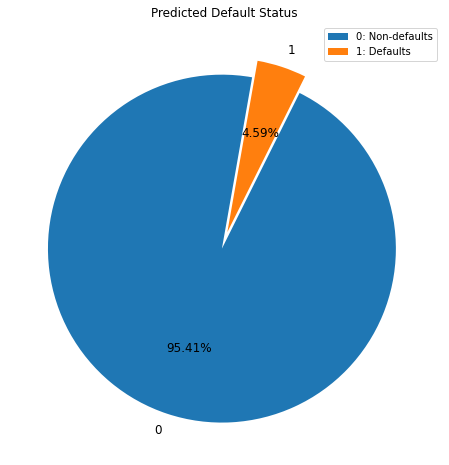

In [52]:
# Create pie chart with percentage labels and explode the two sections
explode = (0.05, 0.05)
f['Pred_Default'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode=explode, startangle=80, 
                                      legend=True, fontsize=12, figsize=(8,8), textprops={'color':"black"})

# Add title and legend
plt.title('Predicted Default Status')
plt.legend(["0: Non-defaults","1: Defaults"])

# Remove the y-axis label and ticks
plt.ylabel("")
plt.tick_params(axis='y', which='both', length=0)

# Show plot
plt.show()

In [53]:
counts_aggclass = f.groupby("agg_class")["Pred_Default"].value_counts()

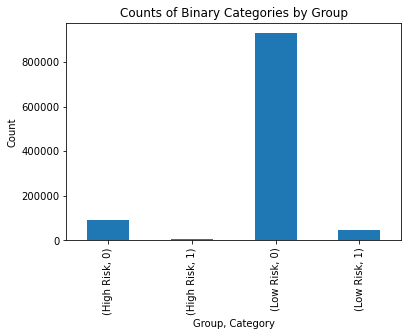

In [54]:
# Plot the counts as a bar chart
counts_aggclass.plot(kind="bar")

# Set the title and axis labels
plt.title("Counts of Binary Categories by Group")
plt.xlabel("Group, Category")
plt.ylabel("Count")

# Show the plot
plt.show()

In [55]:
df_counts_aggclass = counts_aggclass.to_frame()
df_counts_aggclass = df_counts_aggclass.rename(columns={'Pred_Default': 'count'})
df_counts_aggclass = df_counts_aggclass.reset_index()

In [56]:
counts_ethnicity = f.groupby("Ethnicity")["Pred_Default"].value_counts()
df_counts_ethnicity = counts_ethnicity.to_frame()
df_counts_ethnicity = df_counts_ethnicity.rename(columns={'Pred_Default': 'Total_Loans'})
df_counts_ethnicity = df_counts_ethnicity.reset_index()

In [57]:
default_total = f.groupby('Ethnicity')["Pred_Default"].agg(['count'])
default_total = default_total.rename(columns={'count': 'Total_Loans'})
default_total = default_total.reset_index()

In [58]:
minority_df = pd.merge(df_counts_ethnicity, default_total, on='Ethnicity')
minority_df = minority_df.rename(columns={'Total_Loans_x': 'Total_Loans_by_default','Total_Loans_y': 'Total_Loans'})
minority_df['Perct_def_by_ethnic'] = (minority_df['Total_Loans_by_default']/minority_df['Total_Loans'])*100

In [59]:
counts_aggclass_ethnic = f.groupby("agg_class")["Ethnicity"].value_counts()
df_counts_aggclass_ethnic = counts_aggclass_ethnic.to_frame()
df_counts_aggclass_ethnic = df_counts_aggclass_ethnic.rename(columns={'Ethnicity': 'count'}) 

In [60]:
counts_aggclass_ethnic_def = f.groupby(["agg_class", "Ethnicity"])["Pred_Default"].value_counts()
df_counts_aggclass_ethnic_def = counts_aggclass_ethnic_def.to_frame()
df_counts_aggclass_ethnic_def = df_counts_aggclass_ethnic_def.rename(columns={'Pred_Default': 'count'})
df_counts_aggclass_ethnic_def  = df_counts_aggclass_ethnic_def .reset_index()

In [61]:
minority_df_eth = minority_df[minority_df["Pred_Default"] == 1]
minority_df_eth = minority_df_eth[['Ethnicity', 'Perct_def_by_ethnic']]
minority_df_eth

,Ethnicity,Perct_def_by_ethnic
1,2 or more minority races,3.753994
3,American Indian or Alaska Native,4.844720
5,Asian,2.669506
7,Black or African American,5.082390
9,Ethnicity_Joint,4.912105
11,Hawaiian or Other Pacific Islander,5.719392
13,Hispanice or Latino,4.749639
15,Race Joint,3.942347
17,White,4.732328


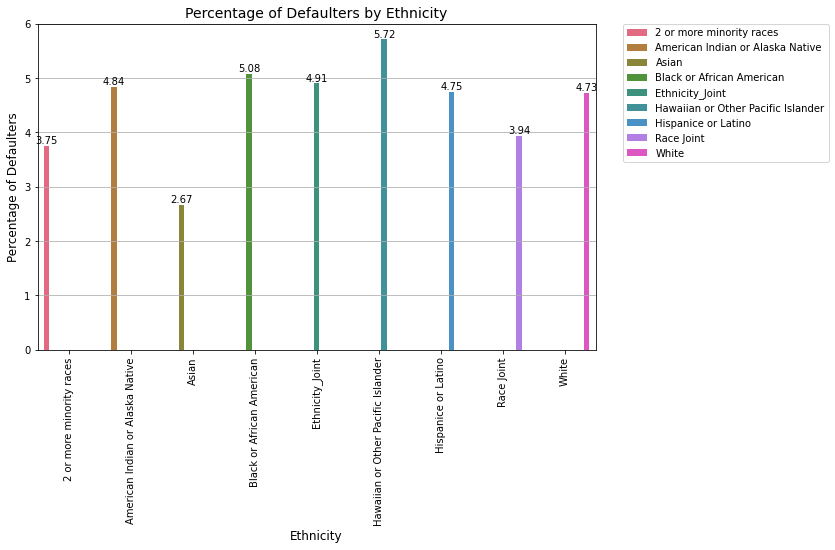

In [62]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(minority_df_eth["Ethnicity"].unique()))
colors = sns.husl_palette(len(minority_df_eth["Ethnicity"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="Ethnicity", y="Perct_def_by_ethnic", hue="Ethnicity", data=minority_df_eth, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("Ethnicity", fontsize=12)
ax.set_ylabel("Percentage of Defaulters", fontsize=12)

# Set the title
ax.set_title("Percentage of Defaulters by Ethnicity", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [63]:
minority_df3 = pd.merge(pd.merge(df_counts_aggclass_ethnic_def, default_total, on='Ethnicity', how='outer'), minority_df_eth, on='Ethnicity', how='outer')
minority_df3.fillna(0, inplace=True)
minority_df3 = minority_df3.rename(columns={'count': 'Total_Loans_by_default','count_y': 'Total_Loans'})

minority_df3['Perct_by_def_Risk'] = (minority_df3['Total_Loans_by_default']/minority_df3['Total_Loans'])*100
minority_df3.set_index(['agg_class','Ethnicity','Pred_Default'], inplace=True)
#minority_df3 = minority_df3.rename(columns={'count_x': 'count_by_risk_class', 'count_y': 'count_total_by_ethnicity'})
minority_df3

Total_Loans_by_default  \
agg_class Ethnicity                          Pred_Default                           
High Risk 2 or more minority races           0                                 77   
                                             1                                  1   
Low Risk  2 or more minority races           0                               1128   
                                             1                                 46   
High Risk American Indian or Alaska Native   0                                223   
                                             1                                 10   
Low Risk  American Indian or Alaska Native   0                               2841   
                                             1                                146   
High Risk Asian                              0                               8239   
                                             1                                219   
Low Risk  Asian                              0                              70369   
                                             1                               1937   
High Risk Black or African American          0                               3467   
                                             1                                185   
Low Risk  Black or African American          0                              57304   
                                             1                               3069   
High Risk Ethnicity_Joint                    0                               2528   
                                             1                                117   
Low Risk  Ethnicity_Joint                    0                              24031   
                                             1                               1255   
High Risk Hawaiian or Other Pacific Islander 0                                195   
                                             1                                 11   
Low Risk  Hawaiian or Other Pacific Islander 0                               1915   
                                             1                                117   
High Risk Hispanice or Latino                0                               9998   
                                             1                                477   
Low Risk  Hispanice or Latino                0                              87626   
                                             1                               4391   
High Risk Race Joint                         0                               1788   
                                             1                                 80   
Low Risk  Race Joint                         0                              19605   
                                             1                                798   
High Risk White                              0                              65831   
                                             1                               3115   
Low Risk  White                              0                             663504   
                                             1                              33114   

                                                           Total_Loans  \
agg_class Ethnicity                          Pred_Default                
High Risk 2 or more minority races           0                    1252   
                                             1                    1252   
Low Risk  2 or more minority races           0                    1252   
                                             1                    1252   
High Risk American Indian or Alaska Native   0                    3220   
                                             1                    3220   
Low Risk  American Indian or Alaska Native   0                    3220   
                                             1                    3220   
High Risk Asian                              0                   80764   
              

In [64]:
mindf = minority_df3.reset_index()
mindf

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,Total_Loans,Perct_def_by_ethnic,Perct_by_def_Risk
0,High Risk,2 or more minority races,0,77,1252,3.753994,6.150160
1,High Risk,2 or more minority races,1,1,1252,3.753994,0.079872
2,Low Risk,2 or more minority races,0,1128,1252,3.753994,90.095847
3,Low Risk,2 or more minority races,1,46,1252,3.753994,3.674121
4,High Risk,American Indian or Alaska Native,0,223,3220,4.844720,6.925466
5,High Risk,American Indian or Alaska Native,1,10,3220,4.844720,0.310559
6,Low Risk,American Indian or Alaska Native,0,2841,3220,4.844720,88.229814
7,Low Risk,American Indian or Alaska Native,1,146,3220,4.844720,4.534161
8,High Risk,Asian,0,8239,80764,2.669506,10.201327
9,High Risk,Asian,1,219,80764,2.669506,0.271160


In [65]:
mindf# Group the data by category and default and get the sum of Value1
grouped = mindf.groupby(['agg_class', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('agg_class').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='agg_class') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['agg_class', 'Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['agg_class', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum', 'default_rate': 'mean'})

print(final_grouped)
final_grouped_def  = final_grouped.reset_index()
final_grouped_def = final_grouped_def[final_grouped_def['Pred_Default']==1]
final_grouped_def

                        Total_Loans_by_default  default_rate
agg_class Pred_Default                                      
High Risk 0                              92346     95.634884
          1                               4215      4.365116
Low Risk  0                             928323     95.389110
          1                              44873      4.610890


,agg_class,Pred_Default,Total_Loans_by_default,default_rate
1,High Risk,1,4215,4.365116
3,Low Risk,1,44873,4.610890


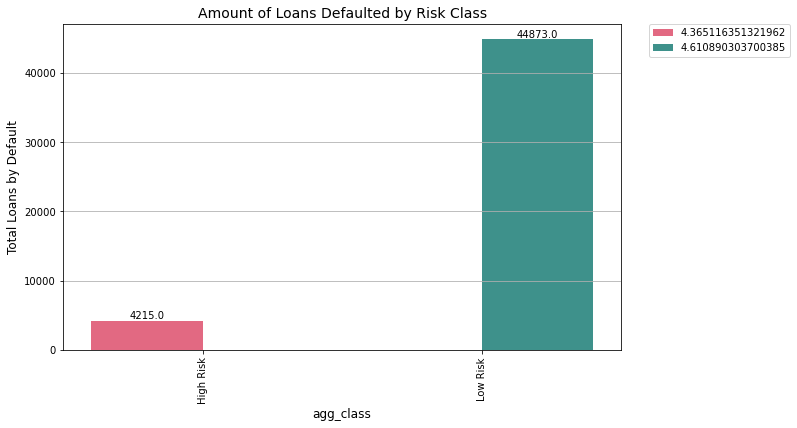

In [66]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(final_grouped_def["default_rate"].unique()))
colors = sns.husl_palette(len(final_grouped_def["default_rate"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="Total_Loans_by_default",  hue="default_rate", data=final_grouped_def, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Total Loans by Default", fontsize=12)

# Set the title
ax.set_title("Amount of Loans Defaulted by Risk Class", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [67]:
mindf# Group the data by category and default and get the sum of Value1
grouped = mindf.groupby(['agg_class','Ethnicity', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('agg_class').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='agg_class') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['agg_class','Ethnicity', 'Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['agg_class','Ethnicity', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum', 'default_rate': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['agg_class','Ethnicity'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  \
agg_class Ethnicity                                          
High Risk 2 or more minority races                       1   
          American Indian or Alaska Native               1   
          Asian                                          1   
          Black or African American                      1   
          Ethnicity_Joint                                1   
          Hawaiian or Other Pacific Islander             1   
          Hispanice or Latino                            1   
          Race Joint                                     1   
          White                                          1   
Low Risk  2 or more minority races                       1   
          American Indian or Alaska Native               1   
          Asian                                          1   
          Black or African American                      1   
          Ethnicity_Joint                                1   
          Hawaiian or Other Pacific Islander             1   
          Hispanice or Latino                            1   
          Race Joint                                     1   
          White                                          1   

                                              Total_Loans_by_default  \
agg_class Ethnicity                                                    
High Risk 2 or more minority races                                 1   
          American Indian or Alaska Native                        10   
          Asian                                                  219   
          Black or African American                              185   
          Ethnicity_Joint                                        117   
          Hawaiian or Other Pacific Islander                      11   
          Hispanice or Latino                                    477   
          Race Joint                                              80   
          White                                                 3115   
Low Risk  2 or more minority races                                46   
          American Indian or Alaska Native                       146   
          Asian                                                 1937   
          Black or African American                             3069   
          Ethnicity_Joint                                       1255   
          Hawaiian or Other Pacific Islander                     117   
          Hispanice or Latino                                   4391   
          Race Joint                                             798   
          White                                                33114   

                                              default_rate  
agg_class Ethnicity                                         
High Risk 2 or more minority races                0.001036  
          American Indian or Alaska Native        0.010356  
          Asian                                   0.226800  
          Black or African American               0.191589  
          Ethnicity_Joint                         0.121167  
          Hawaiian or Other Pacific Islander      0.011392  
          Hispanice or Latino                     0.493988  
          Race Joint                              0.082849  
          White                                   3.225940  
Low Risk  2 or more minority races                0.004727  
          American Indian or Alaska Native        0.015002  
          Asian                                   0.199035  
          Black or African American               0.315353  
          Ethnicity_Joint                         0.128957  
          Hawaiian or Other Pacific Islander      0.012022  
          Hispanice or Latino                     0.451194  
          Race Joint                              0.081998  
          White                                   3.402603

In [68]:
final = final.reset_index()
final

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,default_rate
0,High Risk,2 or more minority races,1,1,0.001036
1,High Risk,American Indian or Alaska Native,1,10,0.010356
2,High Risk,Asian,1,219,0.226800
3,High Risk,Black or African American,1,185,0.191589
4,High Risk,Ethnicity_Joint,1,117,0.121167
5,High Risk,Hawaiian or Other Pacific Islander,1,11,0.011392
6,High Risk,Hispanice or Latino,1,477,0.493988
7,High Risk,Race Joint,1,80,0.082849
8,High Risk,White,1,3115,3.225940
9,Low Risk,2 or more minority races,1,46,0.004727


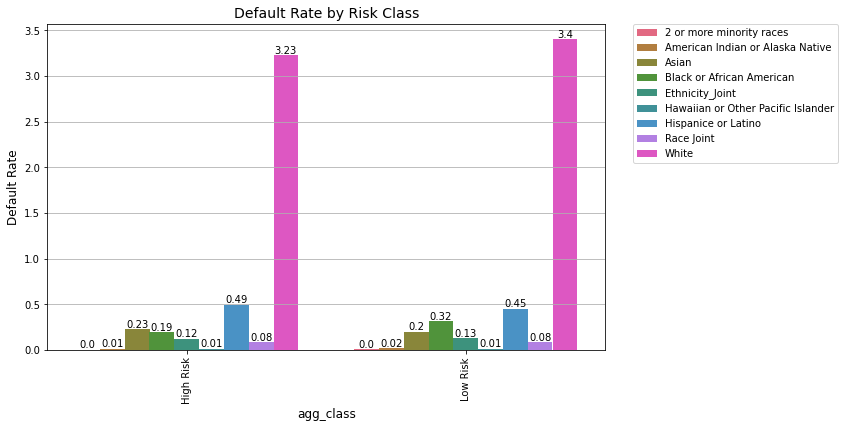

In [69]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(final["Ethnicity"].unique()))
colors = sns.husl_palette(len(final["Ethnicity"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="default_rate", hue="Ethnicity", data=final, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by Risk Class", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [70]:
min_norm2 = final.copy()
# Choose a benchmark ethnicity (e.g. "White")
benchmark_ethnicity = "White"

# Create a copy of the dataframe
adjusted_final = min_norm2.copy()

# For each risk zone, calculate the benchmark rate and adjust the default rates for each ethnicity relative to the benchmark rate
for risk_zone in min_norm2["agg_class"].unique():
    # Calculate the benchmark rate for the current risk zone
    benchmark_rate = min_norm2[(min_norm2["Ethnicity"] == benchmark_ethnicity) & (min_norm2["agg_class"] == risk_zone)]["default_rate"].mean()

    # For each ethnicity and risk zone, divide its mean default rate by the mean default rate of the benchmark ethnicity for the same risk zone
    for ethnicity in min_norm2["Ethnicity"].unique():
        rate = min_norm2[(min_norm2["Ethnicity"] == ethnicity) & (min_norm2["agg_class"] == risk_zone)]["default_rate"].mean()
        ratio = rate / benchmark_rate
        adjusted_final.loc[(adjusted_final["Ethnicity"] == ethnicity) & (adjusted_final["agg_class"] == risk_zone), "default_rate"] *= ratio

# Print the first few rows of the updated dataframe to verify the results
adjusted_final

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,default_rate
0,High Risk,2 or more minority races,1,1,3.324606e-07
1,High Risk,American Indian or Alaska Native,1,10,3.324606e-05
2,High Risk,Asian,1,219,1.594514e-02
3,High Risk,Black or African American,1,185,1.137846e-02
4,High Risk,Ethnicity_Joint,1,117,4.551053e-03
5,High Risk,Hawaiian or Other Pacific Islander,1,11,4.022773e-05
6,High Risk,Hispanice or Latino,1,477,7.564443e-02
7,High Risk,Race Joint,1,80,2.127748e-03
8,High Risk,White,1,3115,3.225940e+00
9,Low Risk,2 or more minority races,1,46,6.566043e-06


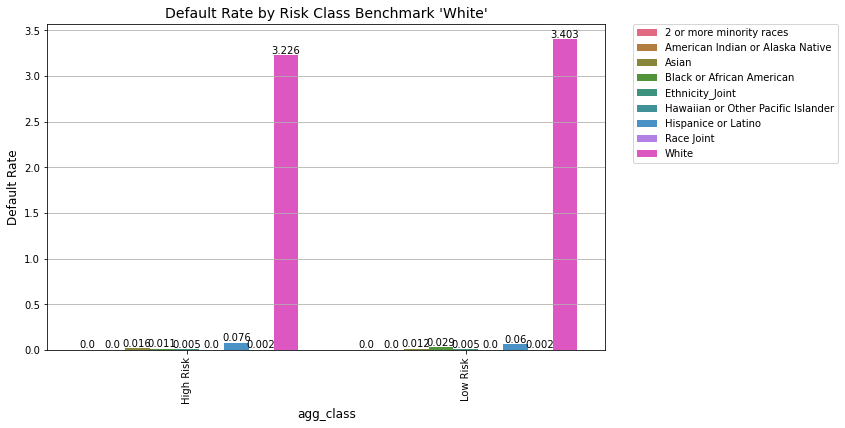

In [71]:
#adjusted_final_filtered = adjusted_final[adjusted_final['Ethnicity'] != 'White']
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(adjusted_final["Ethnicity"].unique()))
colors = sns.husl_palette(len(adjusted_final["Ethnicity"].unique()), l=.6, s=.9)


# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="default_rate", hue="Ethnicity", data=adjusted_final, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by Risk Class Benchmark 'White'", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [72]:
#COUNTY

In [73]:
filtered_df2 = f
counts_def_area12 = filtered_df2.groupby(["countyname",'agg_class'])["Pred_Default"].value_counts()
counts_def_area12 = counts_def_area12.to_frame()
counts_def_area12 = counts_def_area12.rename(columns={'Pred_Default': 'Total_Loans'}) 
counts_def_area12

Total_Loans
countyname          agg_class Pred_Default             
Abbeville County SC Low Risk  0                     114
                              1                       6
Acadia Parish LA    High Risk 0                      15
                              1                       2
                    Low Risk  0                      31
...                                                 ...
Yuba County CA      Low Risk  1                       6
Yuma County AZ      Low Risk  0                     111
                              1                       7
Yuma County CO      Low Risk  0                      37
                              1                       3

[3696 rows x 1 columns]

In [74]:
count_def_area00 = counts_def_area12.reset_index()
count_def_area00

,countyname,agg_class,Pred_Default,Total_Loans
0,Abbeville County SC,Low Risk,0,114
1,Abbeville County SC,Low Risk,1,6
2,Acadia Parish LA,High Risk,0,15
3,Acadia Parish LA,High Risk,1,2
4,Acadia Parish LA,Low Risk,0,31
...,...,...,...,...
3691,Yuba County CA,Low Risk,1,6
3692,Yuma County AZ,Low Risk,0,111
3693,Yuma County AZ,Low Risk,1,7
3694,Yuma County CO,Low Risk,0,37


In [75]:
grouped = count_def_area00.groupby(['countyname','agg_class','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('countyname').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='countyname') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_county']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['countyname','agg_class','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['countyname','agg_class','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_county': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['countyname','agg_class'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  \
countyname          agg_class                              
Abbeville County SC Low Risk              1            6   
Acadia Parish LA    High Risk             1            2   
                    Low Risk              1            3   
Ada County ID       Low Risk              1           28   
Adair County OK     Low Risk              1            8   
...                                     ...          ...   
York County SC      Low Risk              1          101   
Yuba County CA      High Risk             1           11   
                    Low Risk              1            6   
Yuma County AZ      Low Risk              1            7   
Yuma County CO      Low Risk              1            3   

                               default_rate_by_county  
countyname          agg_class                          
Abbeville County SC Low Risk                 5.000000  
Acadia Parish LA    High Risk                3.921569  
                    Low Risk                 5.882353  
Ada County ID       Low Risk                 3.341289  
Adair County OK     Low Risk                19.512195  
...                                               ...  
York County SC      Low Risk                 2.850692  
Yuba County CA      High Risk                3.793103  
                    Low Risk                 2.068966  
Yuma County AZ      Low Risk                 5.932203  
Yuma County CO      Low Risk                 7.500000  

[1637 rows x 3 columns]

In [76]:
final = final.reset_index()
final

,countyname,agg_class,Pred_Default,Total_Loans,default_rate_by_county
0,Abbeville County SC,Low Risk,1,6,5.000000
1,Acadia Parish LA,High Risk,1,2,3.921569
2,Acadia Parish LA,Low Risk,1,3,5.882353
3,Ada County ID,Low Risk,1,28,3.341289
4,Adair County OK,Low Risk,1,8,19.512195
...,...,...,...,...,...
1632,York County SC,Low Risk,1,101,2.850692
1633,Yuba County CA,High Risk,1,11,3.793103
1634,Yuba County CA,Low Risk,1,6,2.068966
1635,Yuma County AZ,Low Risk,1,7,5.932203


In [77]:
mean_value = final['default_rate_by_county'].mean()
mean_value
final['default_rate_by_county'] = final['default_rate_by_county'] / mean_value
final

,countyname,agg_class,Pred_Default,Total_Loans,default_rate_by_county
0,Abbeville County SC,Low Risk,1,6,0.897125
1,Acadia Parish LA,High Risk,1,2,0.703628
2,Acadia Parish LA,Low Risk,1,3,1.055441
3,Ada County ID,Low Risk,1,28,0.599511
4,Adair County OK,Low Risk,1,8,3.500976
...,...,...,...,...,...
1632,York County SC,Low Risk,1,101,0.511485
1633,Yuba County CA,High Risk,1,11,0.680578
1634,Yuba County CA,Low Risk,1,6,0.371224
1635,Yuma County AZ,Low Risk,1,7,1.064386


In [78]:
# sort the dataframe in ascending order based on col1 and col2
df_final = final.sort_values(by=['Total_Loans', 'default_rate_by_county'], ascending=False)
top_10 = df_final.head(15)
top_10

,countyname,agg_class,Pred_Default,Total_Loans,default_rate_by_county
915,Maricopa County AZ,Low Risk,1,1579,1.020613
879,Los Angeles County CA,Low Risk,1,1435,0.671977
283,Clark County NV,Low Risk,1,1181,1.004603
1297,San Diego County CA,Low Risk,1,889,0.933565
336,Cook County IL,Low Risk,1,849,0.597239
121,Bexar County TX,Low Risk,1,723,0.977870
1112,Orange County CA,Low Risk,1,710,0.668092
1256,Riverside County CA,Low Risk,1,604,0.710874
761,King County WA,Low Risk,1,583,0.640568
17,Alameda County CA,Low Risk,1,459,0.555784


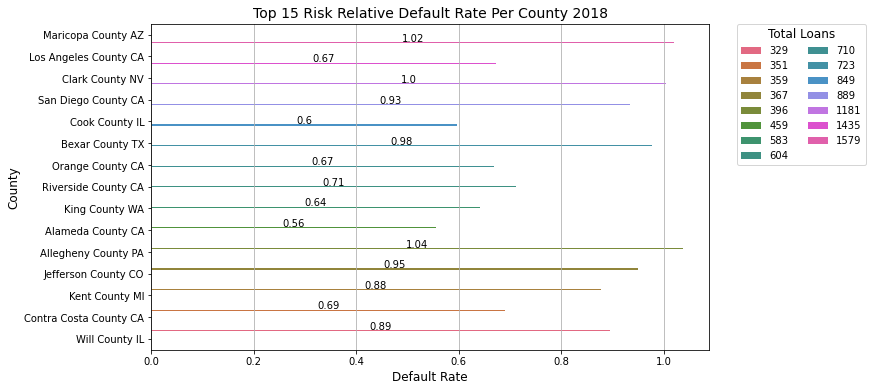

In [79]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(top_10["Total_Loans"].unique()))
colors = sns.husl_palette(len(top_10["Total_Loans"].unique()), l=.6, s=.9)

# Create horizontal bar plot with hue
ax = sns.barplot(y="countyname", x="default_rate_by_county", hue="Total_Loans", data=top_10, palette=colors)

# Add grid lines
ax.grid(True, axis="x")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f"{round(p.get_width(), 2)}", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Set the axis labels
ax.set_xlabel("Default Rate", fontsize=12)
ax.set_ylabel("County", fontsize=12)

# Set the title
ax.set_title("Top 15 Risk Relative Default Rate Per County 2018", fontsize=14)

# Move the legend to the right side and set the title
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Total Loans", title_fontsize=12, ncol=2)

# Show plot
plt.show()

In [80]:
filtered_df2 = f

counts_def_area12 = filtered_df2.groupby(["countyname",'agg_class', 'Ethnicity'])["Pred_Default"].value_counts()
counts_def_area12 = counts_def_area12.to_frame()
counts_def_area12 = counts_def_area12.rename(columns={'Pred_Default': 'Total_Loans'}) 
counts_def_area12

Total_Loans
countyname          agg_class Ethnicity                 Pred_Default             
Abbeville County SC Low Risk  Black or African American 0                       6
                              Hispanice or Latino       0                       1
                              Race Joint                0                       1
                              White                     0                     106
                                                        1                       6
...                                                                           ...
Yuma County CO      Low Risk  Hispanice or Latino       0                       6
                                                        1                       1
                              Race Joint                0                       1
                              White                     0                      30
                                                        1                       2

[13300 rows x 1 columns]

In [81]:
count_def_area00 = counts_def_area12.reset_index()
count_def_area00

,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans
0,Abbeville County SC,Low Risk,Black or African American,0,6
1,Abbeville County SC,Low Risk,Hispanice or Latino,0,1
2,Abbeville County SC,Low Risk,Race Joint,0,1
3,Abbeville County SC,Low Risk,White,0,106
4,Abbeville County SC,Low Risk,White,1,6
...,...,...,...,...,...
13295,Yuma County CO,Low Risk,Hispanice or Latino,0,6
13296,Yuma County CO,Low Risk,Hispanice or Latino,1,1
13297,Yuma County CO,Low Risk,Race Joint,0,1
13298,Yuma County CO,Low Risk,White,0,30


In [82]:
grouped = count_def_area00.groupby(['countyname','agg_class','Ethnicity','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('countyname').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='countyname') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_county']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['countyname','agg_class','Ethnicity','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['countyname','agg_class','Ethnicity','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_county': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['countyname','agg_class','Ethnicity'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  \
countyname          agg_class Ethnicity                                        
Abbeville County SC Low Risk  White                           1            6   
Acadia Parish LA    High Risk Ethnicity_Joint                 1            1   
                              White                           1            1   
                    Low Risk  White                           1            3   
Ada County ID       Low Risk  Asian                           1            1   
...                                                         ...          ...   
Yuma County AZ      Low Risk  Ethnicity_Joint                 1            1   
                              Hispanice or Latino             1            5   
                              White                           1            1   
Yuma County CO      Low Risk  Hispanice or Latino             1            1   
                              White                           1            2   

                                                   default_rate_by_county  
countyname          agg_class Ethnicity                                    
Abbeville County SC Low Risk  White                              5.000000  
Acadia Parish LA    High Risk Ethnicity_Joint                    1.960784  
                              White                              1.960784  
                    Low Risk  White                              5.882353  
Ada County ID       Low Risk  Asian                              0.119332  
...                                                                   ...  
Yuma County AZ      Low Risk  Ethnicity_Joint                    0.847458  
                              Hispanice or Latino                4.237288  
                              White                              0.847458  
Yuma County CO      Low Risk  Hispanice or Latino                2.500000  
                              White                              5.000000  

[3940 rows x 3 columns]

In [83]:
final = final.reset_index()
mean_value = final['default_rate_by_county'].mean()
mean_value
final['default_rate_by_county'] = final['default_rate_by_county'] / mean_value
final

,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans,default_rate_by_county
0,Abbeville County SC,Low Risk,White,1,6,2.159238
1,Acadia Parish LA,High Risk,Ethnicity_Joint,1,1,0.846760
2,Acadia Parish LA,High Risk,White,1,1,0.846760
3,Acadia Parish LA,Low Risk,White,1,3,2.540280
4,Ada County ID,Low Risk,Asian,1,1,0.051533
...,...,...,...,...,...,...
3935,Yuma County AZ,Low Risk,Ethnicity_Joint,1,1,0.365973
3936,Yuma County AZ,Low Risk,Hispanice or Latino,1,5,1.829863
3937,Yuma County AZ,Low Risk,White,1,1,0.365973
3938,Yuma County CO,Low Risk,Hispanice or Latino,1,1,1.079619


In [84]:
df_final = final.reset_index()
# sort the dataframe in ascending order based on col1 and col2
df_final = df_final.sort_values(by=['Total_Loans', 'default_rate_by_county'], ascending=False)
top_10 = df_final.head(15)
top_10

,index,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans,default_rate_by_county
2139,2139,Maricopa County AZ,Low Risk,White,1,1064,1.655268
2051,2051,Los Angeles County CA,Low Risk,White,1,780,0.879114
658,658,Clark County NV,Low Risk,White,1,588,1.203842
3104,3104,San Diego County CA,Low Risk,White,1,573,1.448254
787,787,Cook County IL,Low Risk,White,1,519,0.878730
2621,2621,Orange County CA,Low Risk,White,1,476,1.078034
1793,1793,King County WA,Low Risk,White,1,409,1.081602
78,78,Allegheny County PA,Low Risk,White,1,361,2.274540
2986,2986,Riverside County CA,Low Risk,White,1,336,0.951793
280,280,Bexar County TX,Low Risk,Hispanice or Latino,1,327,1.064482


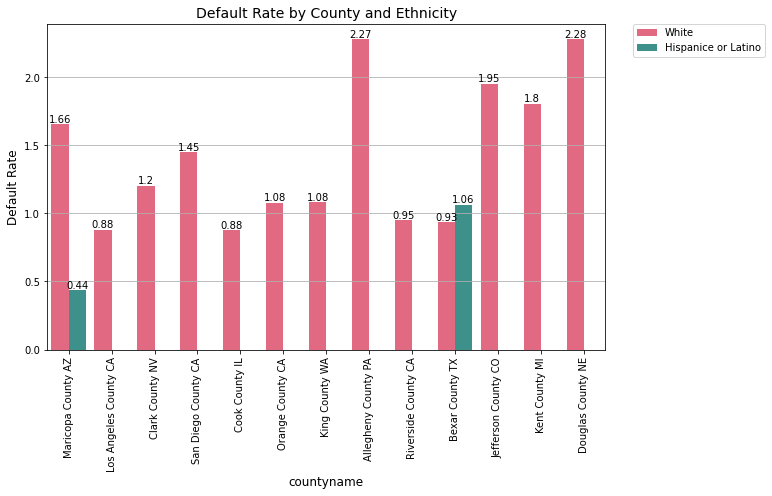

In [85]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(top_10["Ethnicity"].unique()))
colors = sns.husl_palette(len(top_10["Ethnicity"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="countyname", y="default_rate_by_county", hue="Ethnicity", data=top_10, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("countyname", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by County and Ethnicity", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [86]:
minor = count_def_area00.copy()
minor

,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans
0,Abbeville County SC,Low Risk,Black or African American,0,6
1,Abbeville County SC,Low Risk,Hispanice or Latino,0,1
2,Abbeville County SC,Low Risk,Race Joint,0,1
3,Abbeville County SC,Low Risk,White,0,106
4,Abbeville County SC,Low Risk,White,1,6
...,...,...,...,...,...
13295,Yuma County CO,Low Risk,Hispanice or Latino,0,6
13296,Yuma County CO,Low Risk,Hispanice or Latino,1,1
13297,Yuma County CO,Low Risk,Race Joint,0,1
13298,Yuma County CO,Low Risk,White,0,30


In [87]:
# create new column "C" with 0 values
minor['Minority'] = 0
minor['Non_Minority'] = 0

# set "C" to 1 where either "A" is 1 or "B" is 1
minor.loc[(minor['Ethnicity'] == 'American Indian or Alaska Native') | (minor['Ethnicity'] == 'Asian')
        | (minor['Ethnicity'] == 'Black or African American') | (minor['Ethnicity'] == 'Ethnicity_Joint') 
        | (minor['Ethnicity'] == 'Hawaiian or Other Pacific Islander') | (minor['Ethnicity'] == 'Hispanice or Latino')
        |(minor['Ethnicity'] == 'Race Joint') | (minor['Ethnicity'] == '2 or more minority races'),'Minority'] = 1
minor.loc[(minor['Ethnicity'] == 'White'),'Non_Minority'] = 1
#minor_df = minor[['countyname','agg_class','Pred_Default', 'Minority','Non_Minority']]
#chi_df = chi_df[chi_df['Non_Minority']== 0]
minor = minor.drop(['Ethnicity', 'Non_Minority'], axis=1)

minor

,countyname,agg_class,Pred_Default,Total_Loans,Minority
0,Abbeville County SC,Low Risk,0,6,1
1,Abbeville County SC,Low Risk,0,1,1
2,Abbeville County SC,Low Risk,0,1,1
3,Abbeville County SC,Low Risk,0,106,0
4,Abbeville County SC,Low Risk,1,6,0
...,...,...,...,...,...
13295,Yuma County CO,Low Risk,0,6,1
13296,Yuma County CO,Low Risk,1,1,1
13297,Yuma County CO,Low Risk,0,1,1
13298,Yuma County CO,Low Risk,0,30,0


In [88]:
grouped = minor.groupby(['countyname','agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('countyname').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='countyname') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_county']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['countyname','agg_class','Minority','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['countyname','agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_county': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['countyname','agg_class','Minority'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  \
countyname          agg_class Minority                              
Abbeville County SC Low Risk  0                    1            6   
Acadia Parish LA    High Risk 0                    1            1   
                              1                    1            1   
                    Low Risk  0                    1            3   
Ada County ID       Low Risk  0                    1           27   
...                                              ...          ...   
Yuba County CA      Low Risk  1                    1            1   
Yuma County AZ      Low Risk  0                    1            1   
                              1                    1            6   
Yuma County CO      Low Risk  0                    1            2   
                              1                    1            1   

                                        default_rate_by_county  
countyname          agg_class Minority                          
Abbeville County SC Low Risk  0                       5.000000  
Acadia Parish LA    High Risk 0                       1.960784  
                              1                       1.960784  
                    Low Risk  0                       5.882353  
Ada County ID       Low Risk  0                       3.221957  
...                                                        ...  
Yuba County CA      Low Risk  1                       0.344828  
Yuma County AZ      Low Risk  0                       0.847458  
                              1                       5.084746  
Yuma County CO      Low Risk  0                       5.000000  
                              1                       2.500000  

[2543 rows x 3 columns]

In [89]:
final = final.reset_index()
mean_value = final['default_rate_by_county'].mean()
mean_value
final['default_rate_by_county'] = final['default_rate_by_county'] / mean_value
final

,countyname,agg_class,Minority,Pred_Default,Total_Loans,default_rate_by_county
0,Abbeville County SC,Low Risk,0,1,6,1.393640
1,Acadia Parish LA,High Risk,0,1,1,0.546526
2,Acadia Parish LA,High Risk,1,1,1,0.546526
3,Acadia Parish LA,Low Risk,0,1,3,1.639577
4,Ada County ID,Low Risk,0,1,27,0.898050
...,...,...,...,...,...,...
2538,Yuba County CA,Low Risk,1,1,1,0.096113
2539,Yuma County AZ,Low Risk,0,1,1,0.236210
2540,Yuma County AZ,Low Risk,1,1,6,1.417261
2541,Yuma County CO,Low Risk,0,1,2,1.393640


In [90]:
df_final = final.reset_index()
# sort the dataframe in ascending order based on col1 and col2
df_final = df_final.sort_values(by=['Total_Loans', 'default_rate_by_county'], ascending=False)
top_10 = df_final.head(15)
top_10

,index,countyname,agg_class,Minority,Pred_Default,Total_Loans,default_rate_by_county
1400,1400,Maricopa County AZ,Low Risk,0,1,1064,1.068362
1338,1338,Los Angeles County CA,Low Risk,0,1,780,0.567408
1339,1339,Los Angeles County CA,Low Risk,1,1,655,0.476477
436,436,Clark County NV,Low Risk,1,1,593,0.783605
435,435,Clark County NV,Low Risk,0,1,588,0.776998
2010,2010,San Diego County CA,Low Risk,0,1,573,0.934749
516,516,Cook County IL,Low Risk,0,1,519,0.567160
1401,1401,Maricopa County AZ,Low Risk,1,1,515,0.517111
1713,1713,Orange County CA,Low Risk,0,1,476,0.695797
181,181,Bexar County TX,Low Risk,1,1,436,0.916067


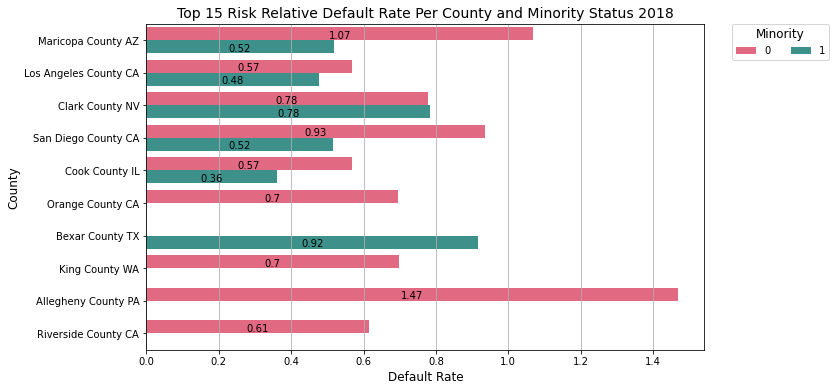

In [91]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(top_10["Minority"].unique()))
colors = sns.husl_palette(len(top_10["Minority"].unique()), l=.6, s=.9)

# Create horizontal bar plot with hue
ax = sns.barplot(y="countyname", x="default_rate_by_county", hue="Minority", data=top_10, palette=colors)

# Add grid lines
ax.grid(True, axis="x")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f"{round(p.get_width(), 2)}", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Set the axis labels
ax.set_xlabel("Default Rate", fontsize=12)
ax.set_ylabel("County", fontsize=12)

# Set the title
ax.set_title("Top 15 Risk Relative Default Rate Per County and Minority Status 2018", fontsize=14)

# Move the legend to the right side and set the title
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Minority", title_fontsize=12, ncol=2)

# Show plot
plt.show()

In [92]:
grouped = minor.groupby(['agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('agg_class').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='agg_class') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_aggclass']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['agg_class','Minority','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_aggclass': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['agg_class','Minority'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  default_rate_by_aggclass
agg_class Minority                                                     
High Risk 0                    1         3115                  3.225940
          1                    1         1100                  1.139176
Low Risk  0                    1        33114                  3.402603
          1                    1        11759                  1.208287

In [93]:
final = final.reset_index()

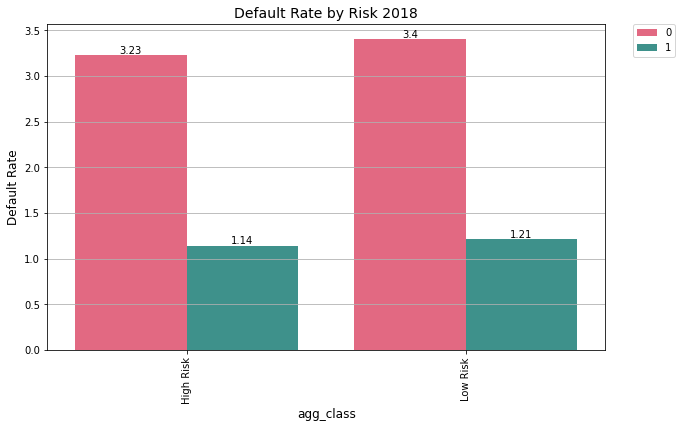

In [94]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(final["Minority"].unique()))
colors = sns.husl_palette(len(final["Minority"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="default_rate_by_aggclass", hue="Minority", data=final, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by Risk 2018", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [95]:
table = mindf[mindf['Pred_Default']==1]
table

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,Total_Loans,Perct_def_by_ethnic,Perct_by_def_Risk
1,High Risk,2 or more minority races,1,1,1252,3.753994,0.079872
3,Low Risk,2 or more minority races,1,46,1252,3.753994,3.674121
5,High Risk,American Indian or Alaska Native,1,10,3220,4.844720,0.310559
7,Low Risk,American Indian or Alaska Native,1,146,3220,4.844720,4.534161
9,High Risk,Asian,1,219,80764,2.669506,0.271160
11,Low Risk,Asian,1,1937,80764,2.669506,2.398346
13,High Risk,Black or African American,1,185,64025,5.082390,0.288950
15,Low Risk,Black or African American,1,3069,64025,5.082390,4.793440
17,High Risk,Ethnicity_Joint,1,117,27931,4.912105,0.418889
19,Low Risk,Ethnicity_Joint,1,1255,27931,4.912105,4.493215


In [96]:
loans_w

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default
0,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,94.700,1,4.375,2913.92,1000.00,...,0,0,1,0,0,0,0,0,680,0
1,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,72.486,3,4.250,1939.00,495.00,...,0,1,0,0,0,0,0,0,680,0
2,5.505900e+10,1.84,Low Risk,Kenosha County WI,215000.0,95.000,2,4.500,1781.69,580.69,...,1,0,0,0,0,0,0,0,680,0
3,5.505900e+10,1.84,Low Risk,Kenosha County WI,105000.0,80.000,1,4.500,1804.00,495.00,...,0,0,0,0,0,1,0,0,680,0
4,5.505900e+10,1.84,Low Risk,Kenosha County WI,175000.0,96.500,2,4.500,4730.95,495.00,...,0,0,1,0,0,0,0,0,680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069752,5.115390e+10,1.13,Low Risk,Prince William County VA,395000.0,97.000,3,4.250,3467.10,1020.00,...,1,0,0,0,0,0,0,0,680,0
1069753,5.115390e+10,1.13,Low Risk,Prince William County VA,385000.0,96.500,4,4.250,6586.12,0.00,...,1,0,0,0,0,0,0,0,680,0
1069754,5.115390e+10,1.13,Low Risk,Prince William County VA,375000.0,101.500,2,4.125,6969.91,0.00,...,0,1,0,0,0,0,0,0,680,0
1069755,5.115390e+10,1.13,Low Risk,Prince William County VA,15000.0,101.500,2,4.125,150.00,0.00,...,0,1,0,0,0,0,0,0,680,0


In [97]:
chi = loans_w.copy()
chi

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default
0,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,94.700,1,4.375,2913.92,1000.00,...,0,0,1,0,0,0,0,0,680,0
1,5.505900e+10,1.84,Low Risk,Kenosha County WI,145000.0,72.486,3,4.250,1939.00,495.00,...,0,1,0,0,0,0,0,0,680,0
2,5.505900e+10,1.84,Low Risk,Kenosha County WI,215000.0,95.000,2,4.500,1781.69,580.69,...,1,0,0,0,0,0,0,0,680,0
3,5.505900e+10,1.84,Low Risk,Kenosha County WI,105000.0,80.000,1,4.500,1804.00,495.00,...,0,0,0,0,0,1,0,0,680,0
4,5.505900e+10,1.84,Low Risk,Kenosha County WI,175000.0,96.500,2,4.500,4730.95,495.00,...,0,0,1,0,0,0,0,0,680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069752,5.115390e+10,1.13,Low Risk,Prince William County VA,395000.0,97.000,3,4.250,3467.10,1020.00,...,1,0,0,0,0,0,0,0,680,0
1069753,5.115390e+10,1.13,Low Risk,Prince William County VA,385000.0,96.500,4,4.250,6586.12,0.00,...,1,0,0,0,0,0,0,0,680,0
1069754,5.115390e+10,1.13,Low Risk,Prince William County VA,375000.0,101.500,2,4.125,6969.91,0.00,...,0,1,0,0,0,0,0,0,680,0
1069755,5.115390e+10,1.13,Low Risk,Prince William County VA,15000.0,101.500,2,4.125,150.00,0.00,...,0,1,0,0,0,0,0,0,680,0


In [98]:
# create new column "C" with 0 values
chi['Minority'] = 0
chi['Non_Minority'] = 0

# set "C" to 1 where either "A" is 1 or "B" is 1
chi.loc[(chi['derived_ethnicity_Hispanic or Latino'] == 1) | (chi['derived_ethnicity_Joint'] == 1)
        | (chi['derived_race_2 or more minority races'] == 1) | (chi['derived_race_American Indian or Alaska Native'] == 1) 
        | (chi['derived_race_Asian'] == 1) | (chi['derived_race_Black or African American'] == 1)
        |(chi['derived_race_Joint'] == 1) | (chi['derived_race_Native Hawaiian or Other Pacific Islander'] == 1),'Minority'] = 1
chi.loc[(chi['derived_race_White'] == 1),'Non_Minority'] = 1
chi_df = chi[['agg_class','Pred_Default', 'Minority','Non_Minority']]
#chi_df = chi_df[chi_df['Non_Minority']== 0]
chi_df

,agg_class,Pred_Default,Minority,Non_Minority
0,Low Risk,0,1,0
1,Low Risk,0,0,1
2,Low Risk,0,0,1
3,Low Risk,0,0,1
4,Low Risk,0,0,1
...,...,...,...,...
1069752,Low Risk,0,0,1
1069753,Low Risk,0,1,1
1069754,Low Risk,0,0,1
1069755,Low Risk,0,0,1


In [99]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df['Pred_Default'], chi_df['Minority'])
contingency_table.fillna(0, inplace=True)
contingency_table

Minority,0,1
Pred_Default,,
0,729335,291334
1,36229,12859


In [100]:
# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 126.72921148508672
P-value: 2.1293214810438613e-29
Degrees of freedom: 1
Expected frequencies: [[730434.52140626 290234.47859374]
 [ 35129.47859374  13958.52140626]]


In [101]:
total_minority = pd.DataFrame([['Pred Default vs Minority', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
total_minority

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Minority,126.729211,2.129321e-29,1


In [102]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df['Pred_Default'], chi_df['agg_class'])
contingency_table.fillna(0, inplace=True)
contingency_table

agg_class,High Risk,Low Risk
Pred_Default,,
0,92346,928323
1,4215,44873


In [103]:
# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 12.06381769483848
P-value: 0.0005140990354732736
Degrees of freedom: 1
Expected frequencies: [[ 92130.0999283 928538.9000717]
 [  4430.9000717  44657.0999283]]


In [104]:
pred_vs_risk = pd.DataFrame([['Pred Default vs Risk', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
pred_vs_risk 

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Risk,12.063818,0.000514,1


In [105]:
chi_df_lowrisk = chi_df[chi_df['agg_class']== 'Low Risk']
chi_df_lowrisk

,agg_class,Pred_Default,Minority,Non_Minority
0,Low Risk,0,1,0
1,Low Risk,0,0,1
2,Low Risk,0,0,1
3,Low Risk,0,0,1
4,Low Risk,0,0,1
...,...,...,...,...
1069752,Low Risk,0,0,1
1069753,Low Risk,0,1,1
1069754,Low Risk,0,0,1
1069755,Low Risk,0,0,1


In [106]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df_lowrisk['Pred_Default'], chi_df_lowrisk['Minority'])
contingency_table.fillna(0, inplace=True)
print(contingency_table)

# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Minority           0       1
Pred_Default                
0             663504  264819
1              33114   11759
Chi-square statistic: 113.28828045434712
P-value: 1.8657679584419073e-26
Degrees of freedom: 1
Expected frequencies: [[664497.70818417 263825.29181583]
 [ 32120.29181583  12752.70818417]]


In [107]:
pred_vs_lowrisk = pd.DataFrame([['Pred Default vs Low Risk Minority', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
pred_vs_lowrisk 

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Low Risk Minority,113.28828,1.865768e-26,1


In [108]:
chi_df_highrisk = chi_df[chi_df['agg_class'] == 'High Risk']
chi_df_highrisk

,agg_class,Pred_Default,Minority,Non_Minority
872,High Risk,0,1,0
873,High Risk,0,0,1
874,High Risk,0,0,1
875,High Risk,0,0,1
876,High Risk,0,1,0
...,...,...,...,...
1068664,High Risk,0,0,1
1068665,High Risk,0,0,1
1068666,High Risk,0,0,1
1068667,High Risk,0,0,1


In [109]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df_highrisk['Pred_Default'], chi_df_highrisk['Minority'])
contingency_table.fillna(0, inplace=True)
print(contingency_table)

# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Minority          0      1
Pred_Default              
0             65831  26515
1              3115   1100
Chi-square statistic: 13.375468291953055
P-value: 0.00025493696653021175
Degrees of freedom: 1
Expected frequencies: [[65936.42688042 26409.57311958]
 [ 3009.57311958  1205.42688042]]


In [110]:
pred_vs_highrisk = pd.DataFrame([['Pred Default vs High Risk Minority', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
pred_vs_highrisk 

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs High Risk Minority,13.375468,0.000255,1


In [111]:
# Concatenate the dataframes
final_chi_table = pd.concat([total_minority,pred_vs_risk,pred_vs_lowrisk ,pred_vs_highrisk])
final_chi_table

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Minority,126.729211,2.129321e-29,1
0,Pred Default vs Risk,12.063818,5.140990e-04,1
0,Pred Default vs Low Risk Minority,113.288280,1.865768e-26,1
0,Pred Default vs High Risk Minority,13.375468,2.549370e-04,1


In [112]:
# save the dataframe as a CSV file
#f.to_csv('my_data2018.csv', index=False)

In [ ]:
X = f.drop(['Pred_Default','census_tract','agg_class','Ethnicity', 'countyname'], axis=1)
y = f['Pred_Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_t = X_train

In [ ]:
### Upsample Minority Class Using resample

## Imbalance Sampling
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

from sklearn.utils import resample
# separate minority and majority classes
not_def = X[X['Pred_Default']==0]
defa = X[X['Pred_Default']==1]

# upsample minority
fraud_upsampled = resample(defa,
                          replace=True, # sample with replacement
                          n_samples=len(not_def), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_def, fraud_upsampled])

# check new class counts
upsampled['Pred_Default'].value_counts()

# trying logistic regression again with the balanced dataset
y_train = upsampled['Pred_Default']
X_train = upsampled.drop('Pred_Default', axis=1)

np.unique(y_test, return_counts=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 18, max_features= 'sqrt', n_estimators= 200)
rf.fit(X_train, y_train)

In [ ]:
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print('Train Accuracy Score', train_score_rf)
print('Test Accuracy Score', test_score_rf)

In [ ]:
prob_rf = rf.predict_proba(X_test)
df_prob_rf = pd.DataFrame(prob_rf)
df_prob_rf.head()

In [ ]:
pred_rf = rf.predict(X_test)
df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.head()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cf_matrix_rf,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, prob_rf[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_rf[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
fi = pd.DataFrame({'feature': X_t.columns, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi.head(20)

In [ ]:
# Calculate feature importances using MDI
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = X_t.columns

# Plot top 10 feature importances
top_k = 7
plt.figure()
plt.title("Top {} Feature Importances - Mean Decrease Impurity".format(top_k))
plt.bar(range(top_k), importances[indices][:top_k], yerr=std[indices][:top_k], align="center")
plt.xticks(range(top_k), np.array(feature_names)[indices][:top_k], fontsize=8, rotation='vertical')
plt.xlim([-1, top_k])
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
#train logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C =0.29, penalty = 'l2', solver = 'sag')
lr.fit(X_train, y_train)

In [ ]:
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)
print('Train Accuracy Score', train_score_lr)
print('Test Accuracy Score', test_score_lr)

In [ ]:
prob_lr = lr.predict_proba(X_test)
df_prob_lr = pd.DataFrame(prob_lr)
df_prob_lr.head()

In [ ]:
pred_lr = lr.predict(X_test)
df_pred_lr = pd.DataFrame(pred_lr)
df_pred_lr.head()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cf_matrix_lr,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, prob_lr[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_lr[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import math
coef = lr.coef_
coef_var = []
coef_exp = []

for x in coef:
  for c in x:
    coef_var.append(c)
    exp = math.exp(c)
    coef_exp.append(exp)
variables = X_t.columns
coef = list(zip(variables, coef_var, coef_exp))
coef_df = pd.DataFrame(coef, columns=['Variables','Coefficients','Odds Ratio'])

inter = lr.intercept_[0]
inter_exp = math.exp(inter)
const = 'Constant'

l = [const, inter, inter_exp]
coef_df.loc[len(coef_df)] = l
coef_df.head(20)

In [ ]:
# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({"Feature": X_t.columns, "Importance": lr.coef_[0]})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.head(10)